In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 100 valores aleatores de 1 columna. Con una distribucion uniforme
X = 2 * np.random.rand(100,1)
# El 2 * rand() es para agregar ruido
X[0:5]

array([[1.20090633],
       [0.27884676],
       [0.20307739],
       [1.24665883],
       [1.05219886]])

In [4]:
X.shape

(100, 1)

In [5]:
# distribucion normal (standard normal) con el mismo Shape de X
# y = b + mX  
# y = bias + slope * X (Feature) + error/noise -> normal
y   = 7   +     10 * X           + np.random.randn(100,1)
y_noError   = 7   +     10 * X  
y.shape


(100, 1)

$$
f(x) -> y
$$

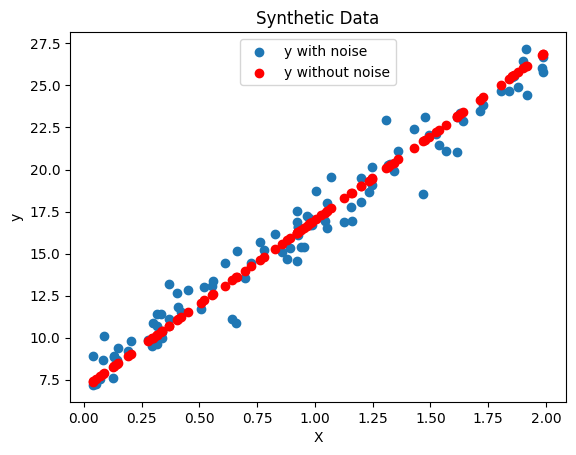

In [6]:
plt.scatter(X,y,label="y with noise")
plt.title("Synthetic Data")
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(X,y_noError,color = 'r',label="y without noise")
plt.legend(loc='upper center')


# Normal Equation
$$
\theta = (X^TX)^{-1} X^T y
$$


In [7]:
# add X0 x= 1, to each instance -> bias
# Matriz de diseño
# concatena un arreglo de unos  con los valores de los Features
X_b = np.c_[np.ones((100,1)),X]
X_b[0:5]

array([[1.        , 1.20090633],
       [1.        , 0.27884676],
       [1.        , 0.20307739],
       [1.        , 1.24665883],
       [1.        , 1.05219886]])

In [8]:
# NumPy linear algebra functions
#XT es X_b.T
# XT * X = X_b.T.dot(X_b)
# (XT * X)^{-1} = inv(X_b.T.dot(X_b))
# (XT * X)^{-1} * XT = inv(X_b.T.dot(X_b)).dot(X_b.T)
# (XT * X)^{-1} * XT * y = inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(f"Theta(s): \n {theta}")

Theta(s): 
 [[7.5823386 ]
 [9.41478272]]


In [9]:
# y = bias + slope *
#y   = 15   +     3 * X 
print(f"Bias: {theta[0]}, W/slope: {theta[1]}")

Bias: [7.5823386], W/slope: [9.41478272]


# Plot the model

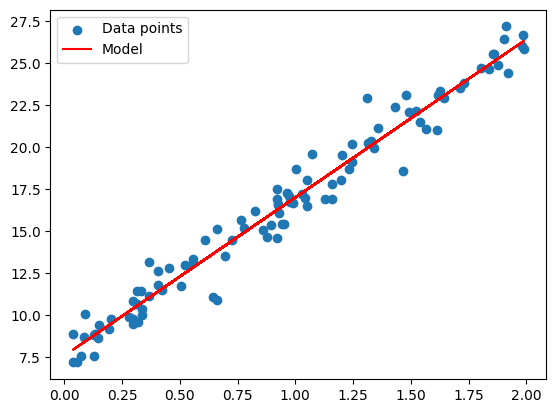

In [10]:
plt.scatter(X, y, label = "Data points")
# X * theta
plt.plot(X, X_b.dot(theta), c = "r", label = "Model")
plt.legend()

In [11]:
X_test = np.array([
    [0],
    [1],
    [1.2]
])

X_test

array([[0. ],
       [1. ],
       [1.2]])

In [12]:
X_test = np.c_[np.ones((3,1)),X_test]
X_test

array([[1. , 0. ],
       [1. , 1. ],
       [1. , 1.2]])

In [13]:
y_preds = X_test.dot(theta)
y_preds

array([[ 7.5823386 ],
       [16.99712132],
       [18.88007787]])

# When to use Normal Equation?
- If numbers of Features in small
- If the number of training examples is smal (around 20,000)

## Complexity?
Inverting a matrix is $O(n^{2.4})$ to $O(n^3)$

# Linear Regression from Sklearn 
- Uses Closed Form
- Based on Least Squares
- uses Moore-Penrose Inverse  $\theta=X^{+}y$   
- It does NOT use Gradient descendent

- All models inherit from estimator instance that provides $fit()$ and $predict()$ functions


## To use Gradient descendent in SKlearn 
-  Use SGDRegressor class: SGD stands for Stochastic Gradient Descent


In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [15]:
# bias           , slope
model.intercept_, model.coef_

(array([7.5823386]), array([[9.41478272]]))

In [16]:
# y = bias + slope 
print(f"Bias: {theta[0]}, W/slope: {theta[1]}")

Bias: [7.5823386], W/slope: [9.41478272]


# Gradient Descent with SKlearn

In [17]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()
model.fit(X, y.reshape(-1))
model.intercept_, model.coef_

(array([7.79624582]), array([9.21531042]))

# Polynomial Regression
- No linear Data
- Is still linear because the paramaters $\theta$ are linear 
## Polynomial Features
- Adding polynomial Degree or power of N to a Feature NOT to the parameters


In [18]:
X = 6 * np.random.rand(100,1) - 3

# y = bias + slope * X^2 (Feature) + slope * X (Feature) + error/noise -> normal
y   = 2   +     2 * X **2         + X           + np.random.randn(100,1)

Text(0.5, 1.0, 'Non-linear Data')

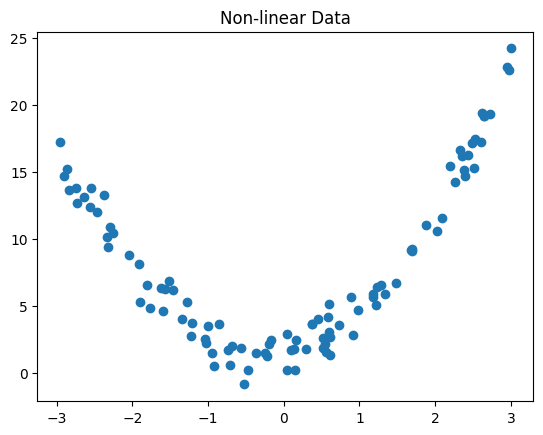

In [19]:
plt.scatter(X,y)
plt.title("Non-linear Data")

In [20]:
X[0:5]

array([[-0.68091576],
       [-1.51495288],
       [ 1.88342469],
       [-2.37113691],
       [ 2.35017872]])

In [21]:
from sklearn.preprocessing import PolynomialFeatures


#pol = PolynomialFeatures(degree = 2)
pol = PolynomialFeatures(degree = 2, include_bias=False)
#pol = PolynomialFeatures(degree = 5, include_bias=False)
X_poly = pol.fit_transform(X)
X_poly[0:5]

array([[-0.68091576,  0.46364628],
       [-1.51495288,  2.29508222],
       [ 1.88342469,  3.54728858],
       [-2.37113691,  5.62229023],
       [ 2.35017872,  5.52334001]])

In [22]:
model = LinearRegression()
model.fit(X_poly,y)
#  Thetas is equal to de number of polinomial degree
print(f"Bias: {model.intercept_}, W/thetas: {model.coef_}")

Bias: [1.62233545], W/thetas: [[1.01866729 2.05415581]]


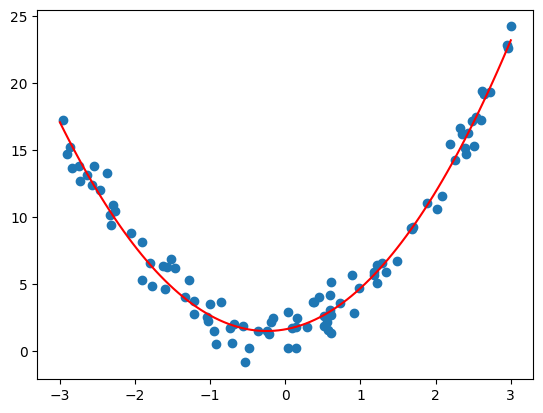

In [23]:
# elements from -3 to 3 with 100 values (100 rows, 1 column)
x_tmp = np.linspace(-3,3,100).reshape(100,1)
#use transform instead of fit_transform as it was done previosly
x_tmp_poly = pol.transform(x_tmp)


plt.scatter(X,y)
#plt.plot(X,model.predict(X_poly))

plt.plot(x_tmp,model.predict(x_tmp_poly),c="r",label="Model")

# Mean squared error
https://scikit-learn.org/stable/modules/model_evaluation.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

In [24]:
from sklearn.metrics import mean_squared_error

y_true = [3, -0.5, 2, 7]

y_pred = [2.5, 0.0, 2, 8]

mse=mean_squared_error(y_true, y_pred)
print (f"mse={mse}")


y_true = [[0.5, 1], [-1, 1], [7, -6]]

y_pred = [[0, 2], [-1, 2], [8, -5]]

mse=mean_squared_error(y_true, y_pred)
print (f"mse={mse}")

mse=0.375
mse=0.7083333333333334


# RMSE Root mean squared error
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html#sklearn.metrics.root_mean_squared_error

In [25]:
from sklearn.metrics import root_mean_squared_error

y_true = [3, -0.5, 2, 7]

y_pred = [2.5, 0.0, 2, 8]

rmse=root_mean_squared_error(y_true, y_pred)
print (f"rmse={rmse}")

y_true = [[0.5, 1],[-1, 1],[7, -6]]

y_pred = [[0, 2],[-1, 2],[8, -5]]

rmse=root_mean_squared_error(y_true, y_pred)
print (f"rmse={rmse}")


rmse=0.6123724356957945
rmse=0.8227486121839513


# Mean absolute error
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

In [26]:
from sklearn.metrics import mean_absolute_error

y_true = [3, -0.5, 2, 7]

y_pred = [2.5, 0.0, 2, 8]

mas=mean_absolute_error(y_true, y_pred)
print (f"mas={mas}")

y_true = [[0.5, 1], [-1, 1], [7, -6]]

y_pred = [[0, 2], [-1, 2], [8, -5]]

mas=mean_absolute_error(y_true, y_pred)
print (f"mas={mas}")

mas=mean_absolute_error(y_true, y_pred, multioutput='raw_values')
print (f"mas={mas}")

mas=mean_absolute_error(y_true, y_pred, multioutput=[0.3, 0.7])
print (f"mas={mas}")

mas=0.5
mas=0.75
mas=[0.5 1. ]
mas=0.85
